In [1]:
import requests

REST_API_KEY = "8cb01ceb3d70c35bae25270a6353bdc5"
KEYWORD_LOCAL_URL = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}&radius=1000"
#'?'뒤는 모두 쿼리 파라미터임: 참고 https://developers.kakao.com/docs/latest/ko/local/dev-guide#search-by-keyword-request-query

keywords = ["성수역", "신촌역"]


In [2]:
response = requests.get(KEYWORD_LOCAL_URL.format(keywords[0] + '맛집'))

response

<Response [401]>


HTTP 상태 코드 401은 "Unauthorized"를 의미합니다. 이는 인증 오류로, 서버가 요청을 처리하기 전에 유효한 인증 자격 증명이 필요하다는 것을 나타냅니다. 이 경우, API 키가 잘못되었거나, 인증 헤더가 올바르게 설정되지 않았을 가능성이 있습니다.

In [3]:
# header에 인증 정보를 추가
# : https://developers.kakao.com/docs/latest/ko/local/dev-guide#search-by-keyword-request-query에서 헤더 부분 참고하기

headers = {
    "Authorization": f"KakaoAK {REST_API_KEY}"
}

response = requests.get(KEYWORD_LOCAL_URL.format(keywords[0] + " 맛집"), headers=headers)
response

<Response [200]>

HTTP 상태 코드 200은 "OK"를 의미하며, 요청이 성공적으로 처리되었음을 나타냅니다. 즉, API 요청이 성공적으로 수행되었고, 응답 데이터를 받을 수 있다는 것을 의미합니다.

In [4]:
# 카카오에서 JSON으로 데이터를 준다는 것을 알고 있으니 Content 말고 json()으로 바로 뽑아올 수 있다

datas = response.json()
datas

{'documents': [{'address_name': '서울 성동구 성수동2가 315-100',
   'category_group_code': 'FD6',
   'category_group_name': '음식점',
   'category_name': '음식점 > 한식 > 감자탕',
   'distance': '',
   'id': '13289056',
   'phone': '02-465-6580',
   'place_name': '소문난성수감자탕',
   'place_url': 'http://place.map.kakao.com/13289056',
   'road_address_name': '서울 성동구 연무장길 45',
   'x': '127.05440457812',
   'y': '37.5428308422967'},
  {'address_name': '서울 성동구 성수동2가 289-273',
   'category_group_code': 'FD6',
   'category_group_name': '음식점',
   'category_name': '음식점 > 한식 > 육류,고기 > 족발,보쌈',
   'distance': '',
   'id': '8416853',
   'phone': '02-464-0425',
   'place_name': '성수족발',
   'place_url': 'http://place.map.kakao.com/8416853',
   'road_address_name': '서울 성동구 아차산로7길 7',
   'x': '127.05431637398702',
   'y': '37.54602762815355'},
  {'address_name': '서울 성동구 성수동2가 277-135',
   'category_group_code': 'CE7',
   'category_group_name': '카페',
   'category_name': '음식점 > 카페',
   'distance': '',
   'id': '145791269',
   'p

In [5]:
datas = response.json()['documents']
datas

[{'address_name': '서울 성동구 성수동2가 315-100',
  'category_group_code': 'FD6',
  'category_group_name': '음식점',
  'category_name': '음식점 > 한식 > 감자탕',
  'distance': '',
  'id': '13289056',
  'phone': '02-465-6580',
  'place_name': '소문난성수감자탕',
  'place_url': 'http://place.map.kakao.com/13289056',
  'road_address_name': '서울 성동구 연무장길 45',
  'x': '127.05440457812',
  'y': '37.5428308422967'},
 {'address_name': '서울 성동구 성수동2가 289-273',
  'category_group_code': 'FD6',
  'category_group_name': '음식점',
  'category_name': '음식점 > 한식 > 육류,고기 > 족발,보쌈',
  'distance': '',
  'id': '8416853',
  'phone': '02-464-0425',
  'place_name': '성수족발',
  'place_url': 'http://place.map.kakao.com/8416853',
  'road_address_name': '서울 성동구 아차산로7길 7',
  'x': '127.05431637398702',
  'y': '37.54602762815355'},
 {'address_name': '서울 성동구 성수동2가 277-135',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페',
  'distance': '',
  'id': '145791269',
  'phone': '070-4353-3238',
  'place_name': '어니언

In [6]:
from bs4 import BeautifulSoup

BeautifulSoup(requests.get("https://place.map.kakao.com/m/13289056#comment").content, 'html.parser')

# https://place.map.kakao.com/m/13289056 -> 위 코드 입력 시 왜 이 링크에 있는 리뷰를 가져오지 못할까?


# 서버는 데이터를 표현하기 위한 레이아웃과 데이터를 사람이 알 수 있도록 표현한 JSON 형식을 클라이언트에게 전달합니다.
# 원래 BeautifulSoup를 사용하여 파싱할 때 HTML에서 원하는 데이터를 추출할 수 있었지만, 서버에서 데이터를 렌더링하는 방식에 따라 달라질 수 있습니다.

# SSR 방식과 CSR 방식

    # SSR 방식 (Server-Side Rendering):

        # 서버에서 HTML 문서를 완전히 렌더링하여 클라이언트에게 전달합니다.
        # 클라이언트는 서버로부터 받은 완성된 HTML 문서를 그대로 표시합니다.
        # BeautifulSoup를 사용하여 서버에서 받은 HTML 문서를 파싱하고, 필요한 데이터를 추출할 수 있습니다.

    # CSR 방식 (Client-Side Rendering):

        # 서버는 기본적인 HTML 문서와 함께 JavaScript 코드를 클라이언트에게 전달합니다.
        # 클라이언트는 JavaScript 코드를 실행하여 필요한 데이터를 API를 통해 서버에서 받아와서 동적으로 HTML 문서를 구성합니다.
        # BeautifulSoup는 서버에서 받은 HTML 문서만을 파싱하기 때문에, JavaScript에 의해 동적으로 생성된 내용은 파싱할 수 없습니다.

# 왜 리뷰를 가져오지 못하는가?
    # 이 경우, 카카오맵 페이지가 Client-Side Rendering (CSR) 방식을 사용하고 있는 것 같습니다.
    # 이는 페이지 로드 후 JavaScript를 통해 동적으로 데이터를 가져와서 렌더링한다는 것을 의미합니다.
    # 따라서 BeautifulSoup는 초기 HTML만을 파싱하기 때문에 리뷰와 같은 동적으로 로드되는 콘텐츠를 가져올 수 없습니다.

    # 해결 방법
        # Selenium 사용:
            # Selenium을 사용하여 실제 브라우저 환경에서 JavaScript를 실행하고, 동적으로 생성된 콘텐츠를 가져올 수 있습니다.
        # API 사용:
            # 해당 웹사이트에서 제공하는 공식 API가 있다면, 이를 사용하여 필요한 데이터를 JSON 형식으로 직접 가져올 수 있습니다.


# SSR 방식(Server-Side Rendering)과 CSR 방식(Client-Side Rendering)을 사용하는지 여부를 알기 위해 몇 가지 방법을 사용할 수 있습니다:

# 1. 페이지 소스 보기
    # 웹 브라우저에서 페이지 소스를 확인하면 힌트를 얻을 수 있습니다.

    # SSR 방식: HTML 소스 코드에 대부분의 콘텐츠가 포함되어 있습니다.
    # CSR 방식: HTML 소스 코드에 기본적인 구조만 있고, 주요 콘텐츠는 JavaScript로 로드됩니다.

    # 방법:
        # 웹 브라우저에서 해당 페이지를 연다.
        # 마우스 오른쪽 버튼을 클릭하고 "페이지 소스 보기"를 선택한다 (또는 Ctrl+U를 눌러 페이지 소스를 연다).
        # 주요 콘텐츠가 HTML 소스에 있는지 확인한다. 만약 주요 콘텐츠가 비어 있거나 JavaScript로 로드되는 것을 보면 CSR 방식일 가능성이 높습니다.

# 2. 네트워크 탭 확인
    # 브라우저 개발자 도구의 네트워크 탭을 사용하여 페이지가 어떻게 데이터를 로드하는지 확인할 수 있습니다.

    # 방법:
        # 웹 브라우저에서 해당 페이지를 연다.
        # F12를 눌러 개발자 도구를 연다.
        # "네트워크" 탭으로 이동한다.
        # 페이지를 새로고침(F5)하고, 어떤 네트워크 요청이 이루어지는지 확인한다.

    # SSR 방식: 초기 요청에서 대부분의 데이터가 HTML로 전달됩니다.
    # CSR 방식: 초기 요청에서는 기본적인 HTML만 전달되고, 추가적인 AJAX 요청을 통해 데이터를 가져옵니다.

# 3. JavaScript 비활성화
    # JavaScript를 비활성화하고 페이지를 새로고침하여 콘텐츠가 로드되는지 확인합니다.

    # 방법:
        # 브라우저에서 JavaScript를 비활성화합니다. (예: Chrome에서는 개발자 도구 > 설정 > JavaScript 비활성화)
        # 페이지를 새로고침합니다.

    # SSR 방식: JavaScript가 비활성화되어도 콘텐츠가 정상적으로 표시됩니다.
    # CSR 방식: JavaScript가 비활성화되면 콘텐츠가 로드되지 않거나 빈 페이지가 표시됩니다.

# 4. API 요청 확인

    # 페이지가 데이터를 API 요청을 통해 받아오는지 확인합니다. CSR 방식은 보통 데이터를 로드하기 위해 API 요청을 많이 사용합니다.

    # 방법:
        # 개발자 도구의 네트워크 탭에서 XHR 또는 Fetch 필터를 사용하여 API 요청을 확인합니다.
        # 페이지가 로드되면서 여러 API 요청이 발생하는지 확인합니다.



<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<title>소문난성수감자탕 | 카카오맵</title>
<meta content="소문난성수감자탕" property="og:title"/>
<meta content="카카오맵" property="og:site_name"/>
<meta content="서울 성동구 연무장길 45 1층 (성수동2가 315-100)" property="og:description"/>
<meta content="website" property="og:type"/>
<meta content="http://map3.daum.net/staticmap/og?type=place&amp;srs=wcongnamul&amp;size=400x200&amp;m=512020%2C1123148&amp;service=placeweb" property="og:image"/>
<meta content="https://place.map.kakao.com/m/13289056" property="og:url"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="소문난성수감자탕" name="twitter:title"/>
<meta content="서울 성동구 연무장길 45 1층 (성수동2가 315-100)" name="twitter:description"/>
<meta content="http://map3.daum.net/staticmap/og?type=place&amp;srs=wcongnamul&amp;size=400x200&amp;m=512020%2C1123148&amp;service=placeweb" name="twitter:image"/>
<meta content="user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, width=dev

# comment 수집하기

In [7]:
COMMENT_URL = 'https://place.map.kakao.com/m/commentlist/v/13289056/0?order=USEFUL&onlyPhotoComment=false'

comment_datas = requests.get(COMMENT_URL).json()
comment_datas


# https://place.map.kakao.com/m/commentlist/v/""""""13289056""""""/''''''0''''''?order=USEFUL&onlyPhotoComment=false
# """"""13289056"""""" -> 이 부분은 카카오에 등록되어 있는 가게의 고유 아이디라는 것을 알 수 있음
# ''''''0'''''' -> 이 부분은 코멘트 아이디

# 따라서 COMMENT_URL = 'https://place.map.kakao.com/m/commentlist/v/{}/{}?order=USEFUL&onlyPhotoComment=false' 이런 표준 형식으로 바꿔줄 수 있음

{'comment': {'placenamefull': '소문난성수감자탕',
  'cid': 13289056,
  'kamapComntcnt': 747,
  'scoresum': 2269,
  'scorecnt': 747,
  'list': [{'commentid': '10774757',
    'contents': '맛은 그냥 그럼, 불친절, 음식 미지근함, 화장실 물어보거나 뭐 달라하면 이모님들이 혼냄 ㅠ\n소문이 안좋은 소문인가??',
    'point': 1,
    'username': '맛없으면딱밤갈김',
    'profile': 'http://t1.daumcdn.net/local/kakaomapPhoto/profile/1fdd6f3fcf48fb40a8ca5ce008100994102e9e10?original',
    'profileStatus': 'S',
    'photoCnt': 1,
    'likeCnt': 0,
    'thumbnail': 'http://t1.daumcdn.net/local/kakaomapPhoto/review/48d33075fb3254519990a0d9cb478bc9bf1a33e4?original',
    'kakaoMapUserId': '1481930648',
    'photoList': [{'url': 'http://t1.daumcdn.net/local/kakaomapPhoto/review/48d33075fb3254519990a0d9cb478bc9bf1a33e4?original',
      'near': False}],
    'ownerReply': {},
    'userCommentCount': 5,
    'userCommentAverageScore': 1.8,
    'myStorePick': False,
    'level': {'nowLevel': 6, 'badge': '01'},
    'date': '2024.08.14.',
    'isMy': False,
    'isBlock': Fals

In [8]:
COMMENT_URL = 'https://place.map.kakao.com/m/commentlist/v/{}/{}?order=USEFUL&onlyPhotoComment=false'

In [9]:
ids = [ data['id'] for data in datas ]
ids

['13289056',
 '8416853',
 '145791269',
 '1783691580',
 '1128989913',
 '1301973155',
 '1302549042',
 '1155031193',
 '936069123',
 '475641876',
 '1038283810',
 '2092039626',
 '12055448',
 '1942841428',
 '12447534']

In [10]:
all_comments = []

for id in ids[:1]:

    # 첫 번째 코멘트의 id는 무조건 0
    comment_id = 0

    # has_next가 true면 계속 수집을 한다. true라면 마지막 코멘트id를 새롭게 넣어서 크롤링한다.
    has_next = True

    while has_next:

        # 수집해야 할 URL 생성
        SCRAP_COMMENT_URL = COMMENT_URL.format(id, comment_id)

        # 만들어진 url로 요청
        response = requests.get(SCRAP_COMMENT_URL)
        comment_datas = response.json()['comment']

        # 댓글 데이터 가져오기
        comment_list = comment_datas['list']

        all_comments.extend(comment_list)
        # all_comments += comment_list

        # 다음 페이지 존재 여부 확인
        has_next = comment_datas['hasNext']

        # has_next가 True인 경우 마지막 코멘트의 id를 comment_id로 설정
        if has_next:
            comment_id = comment_list[-1]['commentid']

        print(comment_list)

all_comments

[{'commentid': '10774757', 'contents': '맛은 그냥 그럼, 불친절, 음식 미지근함, 화장실 물어보거나 뭐 달라하면 이모님들이 혼냄 ㅠ\n소문이 안좋은 소문인가??', 'point': 1, 'username': '맛없으면딱밤갈김', 'profile': 'http://t1.daumcdn.net/local/kakaomapPhoto/profile/1fdd6f3fcf48fb40a8ca5ce008100994102e9e10?original', 'profileStatus': 'S', 'photoCnt': 1, 'likeCnt': 0, 'thumbnail': 'http://t1.daumcdn.net/local/kakaomapPhoto/review/48d33075fb3254519990a0d9cb478bc9bf1a33e4?original', 'kakaoMapUserId': '1481930648', 'photoList': [{'url': 'http://t1.daumcdn.net/local/kakaomapPhoto/review/48d33075fb3254519990a0d9cb478bc9bf1a33e4?original', 'near': False}], 'ownerReply': {}, 'userCommentCount': 5, 'userCommentAverageScore': 1.8, 'myStorePick': False, 'level': {'nowLevel': 6, 'badge': '01'}, 'date': '2024.08.14.', 'isMy': False, 'isBlock': False, 'isEditable': False, 'isMyLike': False}, {'commentid': '10762893', 'contents': '가서 먹은 것 : 뼈해장국1\n\n국물 맛 ☆☆☆\n국물은 다른 감자탕 집처럼 밥말아서 먹고 싶을 정도의 맛이다. \n고기 질 ☆\n이게 고기를 먹으러 온건지 뼈를 먹으러 온건지 모르겠다. 일단 살이 너무 없었다.\n고기 양 ☆\n

[{'commentid': '10774757',
  'contents': '맛은 그냥 그럼, 불친절, 음식 미지근함, 화장실 물어보거나 뭐 달라하면 이모님들이 혼냄 ㅠ\n소문이 안좋은 소문인가??',
  'point': 1,
  'username': '맛없으면딱밤갈김',
  'profile': 'http://t1.daumcdn.net/local/kakaomapPhoto/profile/1fdd6f3fcf48fb40a8ca5ce008100994102e9e10?original',
  'profileStatus': 'S',
  'photoCnt': 1,
  'likeCnt': 0,
  'thumbnail': 'http://t1.daumcdn.net/local/kakaomapPhoto/review/48d33075fb3254519990a0d9cb478bc9bf1a33e4?original',
  'kakaoMapUserId': '1481930648',
  'photoList': [{'url': 'http://t1.daumcdn.net/local/kakaomapPhoto/review/48d33075fb3254519990a0d9cb478bc9bf1a33e4?original',
    'near': False}],
  'ownerReply': {},
  'userCommentCount': 5,
  'userCommentAverageScore': 1.8,
  'myStorePick': False,
  'level': {'nowLevel': 6, 'badge': '01'},
  'date': '2024.08.14.',
  'isMy': False,
  'isBlock': False,
  'isEditable': False,
  'isMyLike': False},
 {'commentid': '10762893',
  'contents': '가서 먹은 것 : 뼈해장국1\n\n국물 맛 ☆☆☆\n국물은 다른 감자탕 집처럼 밥말아서 먹고 싶을 정도의 맛이다. \n고기 질 ☆\n이게 고기를 먹

In [11]:
import pandas as pd

comment_df = pd.DataFrame(all_comments)
comment_df.head()


,commentid,contents,point,username,profile,profileStatus,photoCnt,likeCnt,thumbnail,kakaoMapUserId,...,userCommentCount,userCommentAverageScore,myStorePick,level,date,isMy,isBlock,isEditable,isMyLike,strengths
0,10774757,"맛은 그냥 그럼, 불친절, 음식 미지근함, 화장실 물어보거나 뭐 달라하면 이모님들이...",1,맛없으면딱밤갈김,http://t1.daumcdn.net/local/kakaomapPhoto/prof...,S,1,0,http://t1.daumcdn.net/local/kakaomapPhoto/revi...,1481930648,...,5,1.8,False,"{'nowLevel': 6, 'badge': '01'}",2024.08.14.,False,False,False,False,NaN
1,10762893,가서 먹은 것 : 뼈해장국1\n\n국물 맛 ☆☆☆\n국물은 다른 감자탕 집처럼 밥말...,2,권오성,http://k.kakaocdn.net/dn/RQ8BA/btrdqjNbm6w/kTc...,S,0,0,NaN,1874603413,...,2,3.5,False,"{'nowLevel': 2, 'badge': '01'}",2024.08.13.,False,False,False,False,NaN
2,10755581,웨이팅까지는 좀 과한듯?,3,le,http://t1.daumcdn.net/local/kakaomapPhoto/prof...,S,0,0,NaN,1221285947,...,13,2.8,False,"{'nowLevel': 6, 'badge': '01'}",2024.08.12.,False,False,False,False,NaN
3,10753665,"매번 웨이팅이 엄청 길어서 너무궁금했는데, 생각보다 평범한 맛이라서 놀랬음. 그냥 ...",2,냥델,http://k.kakaocdn.net/dn/46iSW/btrkJmWDSdf/0Wk...,S,1,0,http://t1.daumcdn.net/local/kakaomapPhoto/revi...,1999595173,...,75,4.8,False,"{'nowLevel': 31, 'badge': '03'}",2024.08.11.,False,False,False,False,NaN
4,10742888,양도 많지만 사람이 많다보니 응대가 조금 아쉽긴합니다. 처음엔 맛있었는데 몇 번 가...,4,𖤐3추천4강추5단골,http://th-p.talk.kakao.co.kr/th/talkp/wkCiZukM...,S,0,0,NaN,338001077,...,98,3.5,False,"{'nowLevel': 28, 'badge': '02'}",2024.08.10.,False,False,False,False,NaN


# 수집한 데이터를 토대로 전처리

In [12]:
# pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [13]:
from konlpy.tag import Okt

okt = Okt()
def my_tokenizer(sentence):
  return okt.morphs(sentence, stem=True, norm=True)

In [14]:
# 4점 이상은 긍정(0)
# 3점 이상은 중립(1)
# 3점 미만은 부정(2)

def get_category_sentiment(point):
  if point >= 4: return 0
  elif point >=3 : return 1
  else : return 2

comment_df['target'] = comment_df['point'].apply(get_category_sentiment)
comment_df.head()

,commentid,contents,point,username,profile,profileStatus,photoCnt,likeCnt,thumbnail,kakaoMapUserId,...,userCommentAverageScore,myStorePick,level,date,isMy,isBlock,isEditable,isMyLike,strengths,target
0,10774757,"맛은 그냥 그럼, 불친절, 음식 미지근함, 화장실 물어보거나 뭐 달라하면 이모님들이...",1,맛없으면딱밤갈김,http://t1.daumcdn.net/local/kakaomapPhoto/prof...,S,1,0,http://t1.daumcdn.net/local/kakaomapPhoto/revi...,1481930648,...,1.8,False,"{'nowLevel': 6, 'badge': '01'}",2024.08.14.,False,False,False,False,NaN,2
1,10762893,가서 먹은 것 : 뼈해장국1\n\n국물 맛 ☆☆☆\n국물은 다른 감자탕 집처럼 밥말...,2,권오성,http://k.kakaocdn.net/dn/RQ8BA/btrdqjNbm6w/kTc...,S,0,0,NaN,1874603413,...,3.5,False,"{'nowLevel': 2, 'badge': '01'}",2024.08.13.,False,False,False,False,NaN,2
2,10755581,웨이팅까지는 좀 과한듯?,3,le,http://t1.daumcdn.net/local/kakaomapPhoto/prof...,S,0,0,NaN,1221285947,...,2.8,False,"{'nowLevel': 6, 'badge': '01'}",2024.08.12.,False,False,False,False,NaN,1
3,10753665,"매번 웨이팅이 엄청 길어서 너무궁금했는데, 생각보다 평범한 맛이라서 놀랬음. 그냥 ...",2,냥델,http://k.kakaocdn.net/dn/46iSW/btrkJmWDSdf/0Wk...,S,1,0,http://t1.daumcdn.net/local/kakaomapPhoto/revi...,1999595173,...,4.8,False,"{'nowLevel': 31, 'badge': '03'}",2024.08.11.,False,False,False,False,NaN,2
4,10742888,양도 많지만 사람이 많다보니 응대가 조금 아쉽긴합니다. 처음엔 맛있었는데 몇 번 가...,4,𖤐3추천4강추5단골,http://th-p.talk.kakao.co.kr/th/talkp/wkCiZukM...,S,0,0,NaN,338001077,...,3.5,False,"{'nowLevel': 28, 'badge': '02'}",2024.08.10.,False,False,False,False,NaN,0


In [15]:
comment_df.dropna(how='any', subset=['contents'], inplace=True)
comment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 0 to 745
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   commentid                736 non-null    object 
 1   contents                 736 non-null    object 
 2   point                    736 non-null    int64  
 3   username                 735 non-null    object 
 4   profile                  709 non-null    object 
 5   profileStatus            736 non-null    object 
 6   photoCnt                 736 non-null    int64  
 7   likeCnt                  736 non-null    int64  
 8   thumbnail                212 non-null    object 
 9   kakaoMapUserId           736 non-null    object 
 10  photoList                736 non-null    object 
 11  ownerReply               736 non-null    object 
 12  userCommentCount         736 non-null    int64  
 13  userCommentAverageScore  736 non-null    float64
 14  myStorePick              7

In [16]:
# 정규식을 통한 한글만 남을 수 있게 정제
import re

comment_df['preprocessed_comment'] = comment_df['contents'].apply(lambda s : re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", s))
comment_df[['contents', 'preprocessed_comment']].head()

,contents,preprocessed_comment
0,"맛은 그냥 그럼, 불친절, 음식 미지근함, 화장실 물어보거나 뭐 달라하면 이모님들이...",맛은 그냥 그럼 불친절 음식 미지근함 화장실 물어보거나 뭐 달라하면 이모님들이 혼냄...
1,가서 먹은 것 : 뼈해장국1\n\n국물 맛 ☆☆☆\n국물은 다른 감자탕 집처럼 밥말...,가서 먹은 것 뼈해장국국물 맛 국물은 다른 감자탕 집처럼 밥말아서 먹고 싶을 정도...
2,웨이팅까지는 좀 과한듯?,웨이팅까지는 좀 과한듯
3,"매번 웨이팅이 엄청 길어서 너무궁금했는데, 생각보다 평범한 맛이라서 놀랬음. 그냥 ...",매번 웨이팅이 엄청 길어서 너무궁금했는데 생각보다 평범한 맛이라서 놀랬음 그냥 감자탕 맛
4,양도 많지만 사람이 많다보니 응대가 조금 아쉽긴합니다. 처음엔 맛있었는데 몇 번 가...,양도 많지만 사람이 많다보니 응대가 조금 아쉽긴합니다 처음엔 맛있었는데 몇 번 가니...


<Axes: >

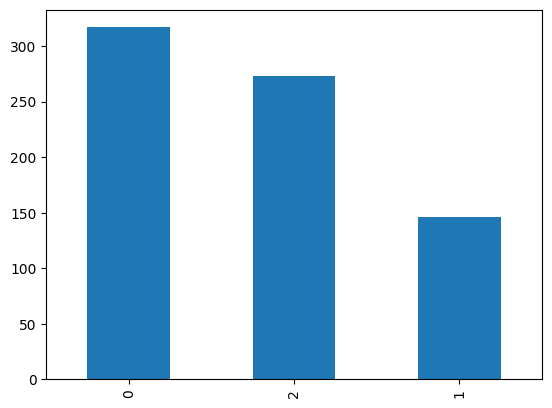

In [17]:
comment_df['target'].value_counts().plot(kind='bar')

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer = my_tokenizer,
    # min_df=0.05,
    # max_df=0.95
)

X = tfidf_vectorizer.fit_transform(comment_df['preprocessed_comment'])
y = comment_df['target']

/opt/anaconda3/envs/ml-env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/envs/ml-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [19]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X, y)

LogisticRegression()

In [20]:

def sentiment_predict(sentence):
  sentence_norm_stem = okt.morphs(sentence, stem=True, norm=True)
  sentence_test = ' '.join(sentence_norm_stem)

  text_vector = tfidf_vectorizer.transform([sentence_test])

  pred = log_clf.predict(text_vector)
  print(sentence, "====>", pred)

In [21]:
sentiment_predict("위생은 좀 더럽지만 맛은 괜찮았어요")

위생은 좀 더럽지만 맛은 괜찮았어요 ====> [1]


In [22]:
sentiment_predict("진짜 존맛탱! 기다려서 먹을만 했던 것 같아요")

진짜 존맛탱! 기다려서 먹을만 했던 것 같아요 ====> [0]


In [23]:
sentiment_predict("기다릴만큼은 아니었던 것 같습니다.")

기다릴만큼은 아니었던 것 같습니다. ====> [2]
